<a href="https://colab.research.google.com/github/MuhammadMaazKhan/Machine-Learning/blob/main/3.Clustering/0.K-Means%20Clustering/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

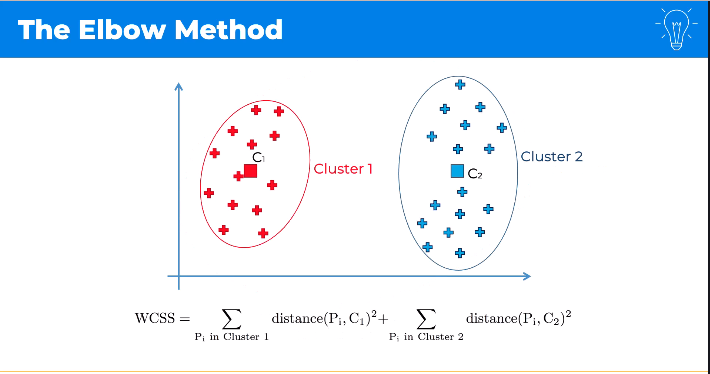

for the Within Cluster Sum of Squares, or the **WCSS**.

Don't worry if it looks a bit complex at first.It's actually very simple.It basically looks at the distance between each point and the centroid of its cluster,and you square that distance.

optimal number of clusters,basically when the WCSS stops dropping as rapidly.

**Random Initialization Trap**

this is not good.The results are different in these two runs
of the same machine learning model of the k-means.

And they're only different becausethe initialization of the centroids was different.We didn't change anything else.And this is called the **Random Initialization Trap.**

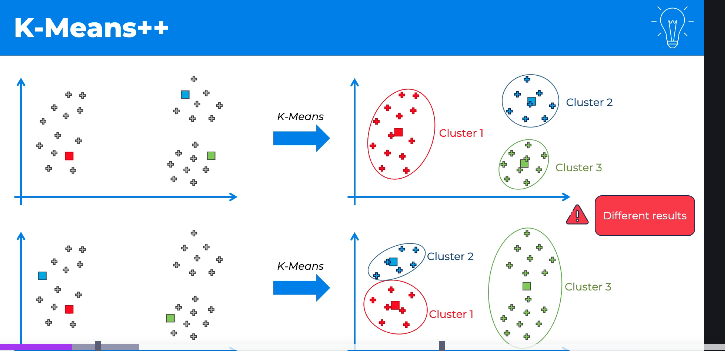

**For solving Rnadom Initialization Trap**

**n_clusters=i:** Varies the number of clusters from 1 to 10.

**init='k-means++':** Instead of randomly picking cluster centers, this method chooses smart starting points.

**random_state=42:** This just locks the randomness, so if you run the code again, you get the same results every time.

**kmeans.fit(X):** Applies K-Means clustering to dataset X.

**kmeans.inertia_:** Stores the WCSS value for each clustering iteration.

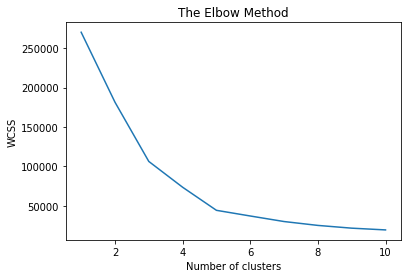

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The **elbow point** is where WCSS decreases sharply before leveling off. **Here** it is **5** means **5 clusters** we need

This helps identify the optimal number of clusters (usually at the "bend" in the graph).

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

Remember X is actually the matrix of two columns containing the annual income in the first column and the spending score (shopping) in the second column.

And each row of X responds to a different customer. And therefore, for each customer, the x-coordinate will be the annual income and the y-coordinate will be the spending score (shopping).

**X[y_kmeans == 0, 0]** → Selects the x-coordinates (annual income) for customers in Cluster 1.

why 0 , 0 b/c in X we have 0,1 (income,score) cols then we apply k-means after knowing clusters through elbow method.

K-means divide X in cluster 1-5. first 0 is indicating clusters second zero indicating feature annual income

**X[y_kmeans == 0, 1]** → Selects the y-coordinates (spending score) for customers in Cluster 1.

why 0 , 1 b/c in X we have 0,1 (income,score) cols then we apply k-means after knowing clusters through elbow method.

 K-means divide X in cluster 1-5. here 0 is indicating clusters then one is indicating feature spending score (shopping)

**s = 100** → Sets the size of the points (. **.** o 0), you can adjust, for centroid we choose bigger definitely because to make difference b/w cluster points and centroid

**kmeans.cluster_centers_[:, 0]** → Gets the X-coordinates of all cluster centers.
since X[:, 0] corresponds to Annual Income, the first column of cluster_centers_[:, 0] gives the centroids' X-coordinates based on income values.

**kmeans.cluster_centers_[:, 1]** → Gets the Y-coordinates of all cluster centers.
since X[:, 1] corresponds to spending score (shopping), the second column of cluster_centers_[:, 1] gives the centroids' X-coordinates based on spending score (shopping).

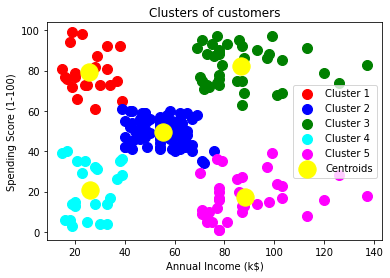

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()